# Uproot, Awkward Array, hist, Vector: from basics to combinatorics

This is an introduction to doing particle physics analysis with Scikit-HEP tools: Uproot, Awkward Array, hist, and Vector in particular.

It starts at a basic level—exploring files, making plots—and ramps up to resolving e⁺e⁻e⁺e⁻, μ⁺μ⁻μ⁺μ⁻, and e⁺e⁻μ⁺μ⁻ final states in Higgs decays.

Due to time constraints, this is not a tutorial with exercises for you to try. But I've given 10 such tutorials in the modern era (Awkward Array version ≥ 1), which you can find online:

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--|:--|:--|:--|:--|
| 2020 | EIC collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2020-04-08-eic-jlab#readme) | [video](https://www.youtube.com/watch?v=FoxNS6nlbD0) |
| 2020 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski/2020-06-08-uproot-awkward-columnar-hats#readme) | |
| 2020 | SciPy talk | non-HEP | [notebooks](https://github.com/jpivarski-talks/2020-07-06-scipy2020/blob/master/bikeroutes-execution.ipynb) | [video](https://youtu.be/WlnUF3LRBj4) |
| 2020 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski/2020-07-13-pyhep2020-tutorial#readme) | [video](https://youtu.be/ea-zYLQBS4U) |
| 2021 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats#readme) | |
| 2021 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-07-06-pyhep-uproot-awkward-tutorial#readme) | [video](https://youtu.be/s47Nz0h0vcg) |
| 2021 | STAR collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-09-13-star-uproot-awkward-tutorial#readme) | |
| 2022 | PyHEP topical meeting | | [notebooks](https://indico.cern.ch/event/1140031/) | |
| 2022 | SciPy tutorial | non-HEP | [notebooks](https://github.com/jpivarski-talks/2022-07-11-scipy-loopy-tutorial#readme) | [video](https://youtu.be/Dovyd72eD70) |
| 2022 | CoDaS-HEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2022-08-03-codas-hep-columnar-tutorial#readme) | |

as well as [HSF training events](https://hepsoftwarefoundation.org/Schools/events.html), featuring an [Uproot module](https://hsf-training.github.io/hsf-training-uproot-webpage/) and a [Scikit-HEP module](https://hsf-training.github.io/hsf-training-scikit-hep-webpage/).

This presentation uses the current versions of Uproot, Awkward Array, hist, and Vector that you would get from pip:

```bash
pip install uproot awkward hist[plot] vector
```

- uproot 4.3.5
- awkward 1.9.0
- hist 2.6.1
- vector 0.10.0

Note that new major versions are in development, to be released in December 2022 (uproot 5.0, awkward 2.0, vector 1.0), but the code in this notebook will still work in the new versions, though the outputs will look a little different (better).

In [1]:
import uproot

In [2]:
import awkward as ak

<br><br><br><br><br>

## Overview

Just as in the broader Python world, functionality in Scikit-HEP is provided by small, specialized, interoperating libraries that build on each other.

<table width="1000px"><tr style="background: white">
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scientific Python ecosystem</td>
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scikit-HEP ecosystem</td>
</tr><tr style="background: white">
    <td align="center" width="50%"><img src="img/shells-border.png" width="95%"></td>
    <td align="center" width="50%"><img src="img/shells-hep.svg" width="95%"></td>
</tr></table>

<br><br><br><br><br>

## Libraries used in this talk

<br><br>

<img src="img/uproot-logo.png" width="200px">

<p style="font-size: 14pt">Reads ROOT data as <span style="background: yellow">arrays</span>.</p>

<br><br>

<img src="img/awkward-logo.png" width="200px">

<p style="font-size: 14pt">Manipulates <span style="background: yellow">arrays</span> of arbitrary data structures.</p>

<br><br>

<img src="img/vector-logo.png" width="200px">

<p style="font-size: 14pt">Transforms <span style="background: yellow">arrays</span> of 2D, 3D, and Lorentz vectors.</p>

<br><br>

<img src="img/hist-logo.png" width="200px">

<p style="font-size: 14pt">Fills histograms from <span style="background: yellow">arrays</span> of data.</p>

<br><br>

<b>Using them effectively will require thinking about whole arrays at a time.</b>

<br><br><br>

## Array-at-a-time thinking and interactivity

There's a long history of _array-oriented_ languages, which take arrays as the fundamental data type.

<img src="img/apl-timeline.svg" width="800">

<br><br><br>

Interestingly enough, they all (except Fortran 90 and Dex) are _interactive_, command-line or notebook-driven languages.

<br>

It's because they focus on problems in which we want to know what happens to whole distributions, not individual values.

<br>

For example,

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<br><br>

Suppose we start with a Gaussian-distributed dataset.

In [4]:
dataset = np.random.normal(0, 1, 1000000)  # one MILLION data points

<br><br>

"How are they distributed?"

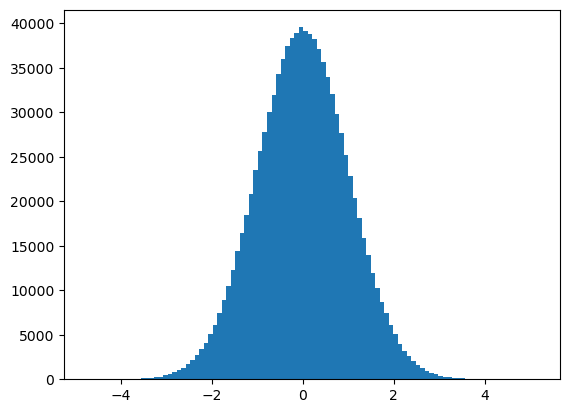

In [5]:
plt.hist(dataset, bins=100);

<br><br>

"How is the square of each point distributed?"

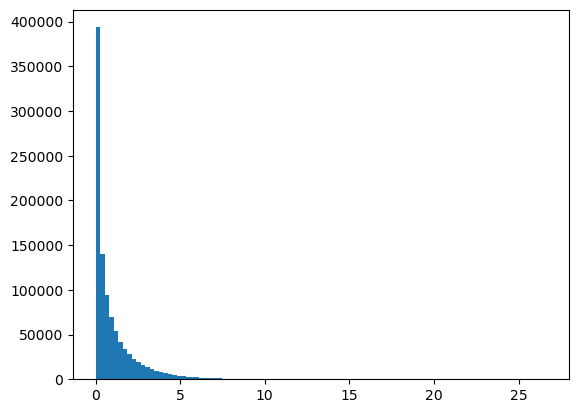

In [6]:
plt.hist(dataset**2, bins=100);

<br><br>

"What about this weirdo function?"

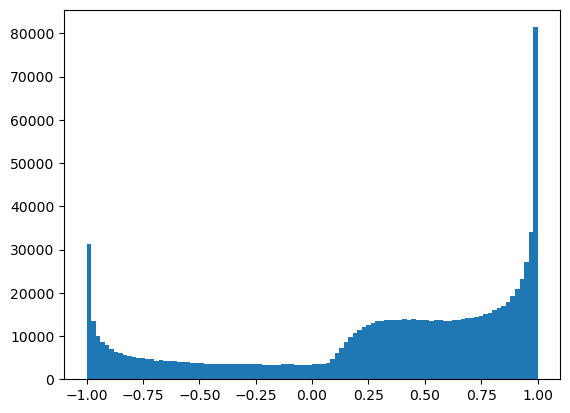

In [7]:
plt.hist(np.sin(1/dataset**2), bins=100);

<br><br>

The shape of the last distribution would have been hard to guess, and as long as we're in "compute operation, plot, compute operation, plot" mode, setting up `for` loops would be a hindrance.

<br><br>

Array-oriented computations and interactivity go together. If you don't like Jupyter, consider IPython, the basic Python prompt, or IDE features that let you interact with an ongoing session. Don't just run a script until you've already figured out the details of your project.

<br><br><br><br><br>

## Exploring a file with Uproot

Uproot is a reimplementation of ROOT I/O in Python, with no dependence on C++ ROOT.

<img src="img/abstraction-layers.svg" width="800">

<br><br><br>

"Where's my file?"

(Executing shell commands with `!` is a Jupyter/IPython thing.)

In [8]:
!ls -l

total 752
drwxr-xr-x   3 jpivarski  staff      96 Sep 11 12:48 data
drwxr-xr-x  10 jpivarski  staff     320 Sep 11 12:49 img
-rw-r--r--   1 jpivarski  staff  381051 Sep 11 16:05 pyhep2022-uproot-and-awkward-array.ipynb


In [9]:
!ls -l data

total 82816
-rw-r--r--  1 jpivarski  staff  42400229 Sep 11 12:48 SMHiggsToZZTo4L.root


<br><br>

"Open it in Uproot."

In [10]:
file = uproot.open("data/SMHiggsToZZTo4L.root")
file

<ReadOnlyDirectory '/' at 0x000127ae79d0>

<br><br>

"What's in the file?"

In [11]:
file.keys()

['Events;1']

<br><br>

"What kind of object is 'Events'?"

In [12]:
file.classnames()

{'Events;1': 'TTree'}

<br><br>

"Get the TTree metadata (not the whole arrays; not yet)."

In [13]:
tree = file["Events"]
tree

<TTree 'Events' (32 branches) at 0x00010814eb30>

In [14]:
tree.num_entries

299973

<br><br>

"What kinds of data are in the TTree?"

In [15]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
PV_npvs              | int32_t                  | AsDtype('>i4')
PV_x                 | float                    | AsDtype('>f4')
PV_y                 | float                    | AsDtype('>f4')
PV_z                 | float                    | AsDtype('>f4')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge       

<br><br>

"Can I get that information programmatically?"

(Yes.)

In [16]:
{key: branch.typename for key, branch in tree.items()}

{'run': 'int32_t',
 'luminosityBlock': 'uint32_t',
 'event': 'uint64_t',
 'PV_npvs': 'int32_t',
 'PV_x': 'float',
 'PV_y': 'float',
 'PV_z': 'float',
 'nMuon': 'uint32_t',
 'Muon_pt': 'float[]',
 'Muon_eta': 'float[]',
 'Muon_phi': 'float[]',
 'Muon_mass': 'float[]',
 'Muon_charge': 'int32_t[]',
 'Muon_pfRelIso03_all': 'float[]',
 'Muon_pfRelIso04_all': 'float[]',
 'Muon_dxy': 'float[]',
 'Muon_dxyErr': 'float[]',
 'Muon_dz': 'float[]',
 'Muon_dzErr': 'float[]',
 'nElectron': 'uint32_t',
 'Electron_pt': 'float[]',
 'Electron_eta': 'float[]',
 'Electron_phi': 'float[]',
 'Electron_mass': 'float[]',
 'Electron_charge': 'int32_t[]',
 'Electron_pfRelIso03_all': 'float[]',
 'Electron_dxy': 'float[]',
 'Electron_dxyErr': 'float[]',
 'Electron_dz': 'float[]',
 'Electron_dzErr': 'float[]',
 'MET_pt': 'float',
 'MET_phi': 'float'}

<br><br>

"Read the muon $p_T$, $\eta$, $\phi$, and mass into arrays (and nothing else!)."

This is the first _expensive_ operation, where you might have to wait.

In [17]:
muon_kinematics = tree.arrays(["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", "Muon_charge"])
muon_kinematics

<Array [{Muon_pt: [63, ... Muon_charge: []}] type='299973 * {"Muon_pt": var * fl...'>

<br><br>

Note that there's a way to limit how much you read/how long you have to wait while Uproot fetches data:

In [75]:
tree.arrays(entry_start=0, entry_stop=100)

<Array [{run: 1, ... MET_phi: -2.27}] type='100 * {"run": int32, "luminosityBloc...'>

<br><br>

This is an Awkward Array. NumPy can't represent this dataset because there's a different number of muons in each event.

In [73]:
muon_kinematics[:3].to_list()

[{'Muon_pt': [63.04386901855469, 38.12034606933594, 4.04868745803833],
  'Muon_eta': [-0.7186822295188904, -0.8794569969177246, -0.320764422416687],
  'Muon_phi': [2.968005895614624, -1.0324749946594238, 1.0385035276412964],
  'Muon_mass': [0.10565836727619171, 0.10565836727619171, 0.10565836727619171],
  'Muon_charge': [1, -1, 1]},
 {'Muon_pt': [],
  'Muon_eta': [],
  'Muon_phi': [],
  'Muon_mass': [],
  'Muon_charge': []},
 {'Muon_pt': [],
  'Muon_eta': [],
  'Muon_phi': [],
  'Muon_mass': [],
  'Muon_charge': []}]

<br><br>

"Extract columns/fields from the already-read data."

In [19]:
muon_kinematics.fields

['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [20]:
muon_kinematics.Muon_pt

<Array [[63, 38.1, 4.05], ... 4.75], [], []] type='299973 * var * float32'>

In [21]:
muon_kinematics.Muon_eta

<Array [[-0.719, -0.879, -0.321], ... [], []] type='299973 * var * float32'>

In [22]:
muon_kinematics.Muon_phi

<Array [[2.97, -1.03, 1.04], ... [], []] type='299973 * var * float32'>

In [23]:
muon_kinematics.Muon_mass

<Array [[0.106, 0.106, 0.106], ... [], []] type='299973 * var * float32'>

In [24]:
muon_kinematics.Muon_charge

<Array [[1, -1, 1], [], ... 1, 1], [], []] type='299973 * var * int32'>

<br><br>

"What is the data type?"

In [25]:
print(muon_kinematics.type)

299973 * {"Muon_pt": var * float32, "Muon_eta": var * float32, "Muon_phi": var * float32, "Muon_mass": var * float32, "Muon_charge": var * int32}


<br><br>

"Which columns in the TTree have anything to do with muons or electrons?"

In [26]:
tree.keys(filter_name=["Muon_*", "Electron_*"])

['Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso04_all',
 'Muon_dxy',
 'Muon_dxyErr',
 'Muon_dz',
 'Muon_dzErr',
 'Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr']

<br><br>

"Read all of those columns into arrays, using the same `filter_name`."

In [27]:
muons_and_electrons = tree.arrays(filter_name=["Muon_*", "Electron_*"])
muons_and_electrons

<Array [{Muon_pt: [63, 38.1, ... 0.00558]}] type='299973 * {"Muon_pt": var * flo...'>

<br><br>

"Show me the type of this larger dataset."

In [28]:
print(muons_and_electrons.type)

299973 * {"Muon_pt": var * float32, "Muon_eta": var * float32, "Muon_phi": var * float32, "Muon_mass": var * float32, "Muon_charge": var * int32, "Muon_pfRelIso03_all": var * float32, "Muon_pfRelIso04_all": var * float32, "Muon_dxy": var * float32, "Muon_dxyErr": var * float32, "Muon_dz": var * float32, "Muon_dzErr": var * float32, "Electron_pt": var * float32, "Electron_eta": var * float32, "Electron_phi": var * float32, "Electron_mass": var * float32, "Electron_charge": var * int32, "Electron_pfRelIso03_all": var * float32, "Electron_dxy": var * float32, "Electron_dxyErr": var * float32, "Electron_dz": var * float32, "Electron_dzErr": var * float32}


<br><br><br><br><br>

## Examining distributions with hist

NumPy and Matplotlib both have `histogram` (or `hist`) functions, but these are _display_ options. In particle physics, we almost always want a histogram object that we can fill in parallel, redraw without refilling, etc. Even weighted histograms with error bars require more than what NumPy and Matplotlib give us.

So although

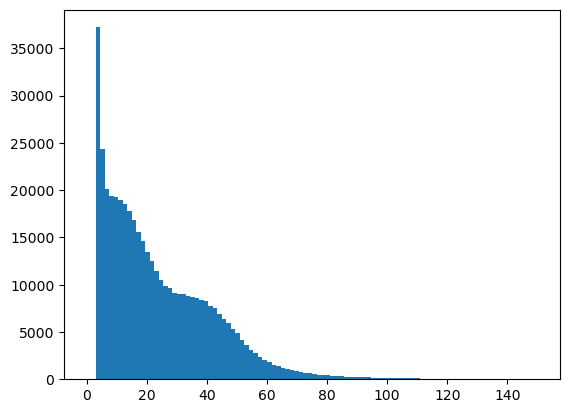

In [29]:
plt.hist(ak.flatten(muon_kinematics.Muon_pt), bins=100, range=(0, 150));

works, you probably want

In [30]:
import hist

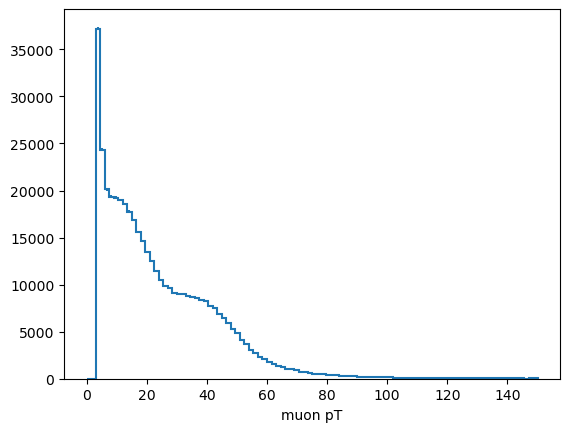

In [31]:
h = hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()

h.fill(ak.flatten(muon_kinematics.Muon_pt))

h.plot();

<br><br><br>

Or even

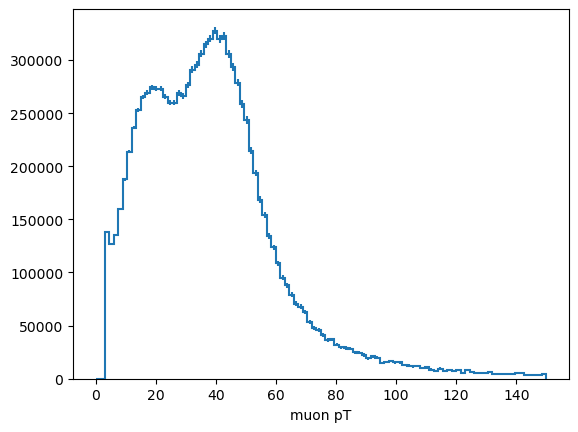

In [32]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Weight()
        .fill(
            ak.flatten(muon_kinematics.Muon_pt),
            weight=ak.flatten(muon_kinematics.Muon_pt),
        )
        .plot()
);

<br><br><br>

### What is `ak.flatten`?

In both of the above examples, we didn't just plot

In [33]:
muon_kinematics.Muon_pt

<Array [[63, 38.1, 4.05], ... 4.75], [], []] type='299973 * var * float32'>

but

In [34]:
ak.flatten(muon_kinematics.Muon_pt)

<Array [63, 38.1, 4.05, ... 4.36, 5.63, 4.75] type='441394 * float32'>

<br><br>

The first array is an array of _lists_. To fill a histogram, you need an array of _numbers_. `ak.flatten` removes the list structure.

<br><br>

There are other ways of removing the list structure, depending on what you're trying to do:

In [35]:
ak.sum(muon_kinematics.Muon_pt, axis=1)

<Array [105, 0, 0, 152, ... 75.6, 19.1, 0, 0] type='299973 * float32'>

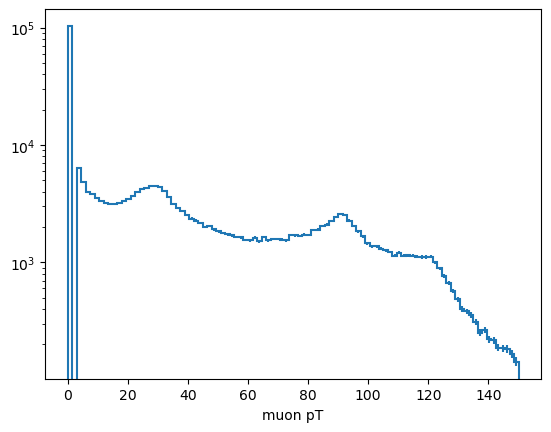

In [36]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.sum(muon_kinematics.Muon_pt, axis=1))
        .plot()
);
plt.yscale("log");

<br><br>

In [37]:
ak.max(muon_kinematics.Muon_pt, axis=1)

<Array [63, None, None, ... 5.63, None, None] type='299973 * ?float32'>

In [38]:
ak.fill_none(ak.max(muon_kinematics.Muon_pt, axis=1), 0)

<Array [63, 0, 0, 54.3, ... 43.1, 5.63, 0, 0] type='299973 * float64'>

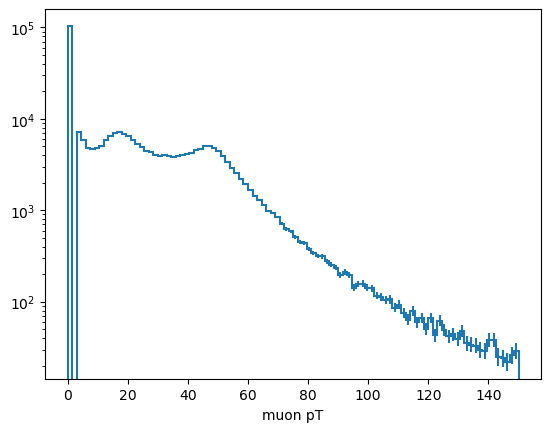

In [39]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill(ak.fill_none(ak.max(muon_kinematics.Muon_pt, axis=1), 0))
        .plot()
);
plt.yscale("log");

<br><br><br><br><br>

## Computing vector coordinates

We can compute coordinate transformations and invariant masses manually, using NumPy's array-at-a-time functions.

In [40]:
px = muon_kinematics.Muon_pt * np.cos(muon_kinematics.Muon_phi)
py = muon_kinematics.Muon_pt * np.sin(muon_kinematics.Muon_phi)
pz = muon_kinematics.Muon_pt * np.sinh(muon_kinematics.Muon_eta)

In [41]:
px

<Array [[-62.1, 19.5, 2.05], ... [], []] type='299973 * var * float32'>

In [42]:
py

<Array [[10.9, -32.7, 3.49], ... [], []] type='299973 * var * float32'>

In [43]:
pz

<Array [[-49.3, -38, -1.32], ... [], []] type='299973 * var * float32'>

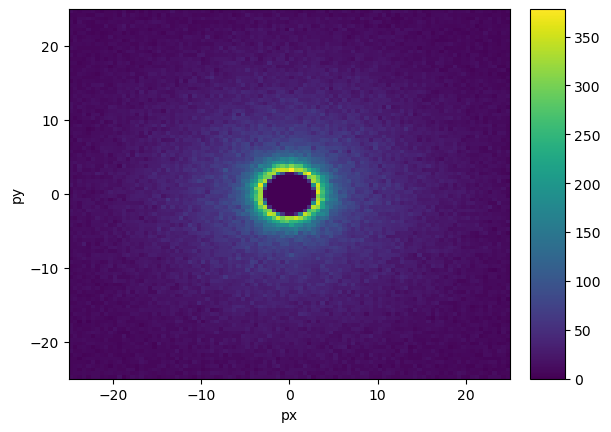

In [44]:
(
    hist.Hist.new.Regular(100, -25, 25, name="px").Regular(100, -25, 25, name="py").Double()
        .fill(ak.flatten(px), ak.flatten(py))
        .plot()
);

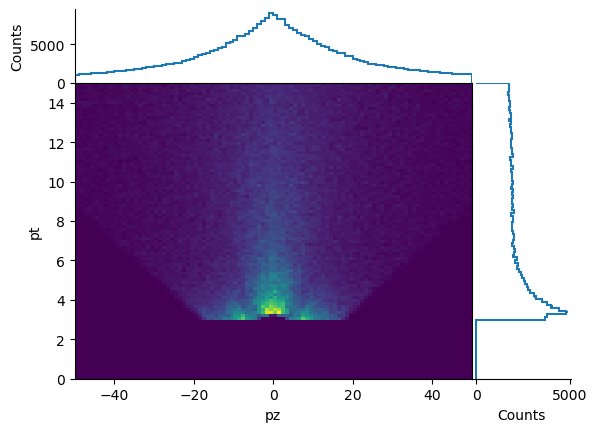

In [45]:
(
    hist.Hist.new.Regular(100, -50, 50, name="pz").Regular(100, 0, 15, name="pt").Double()
        .fill(ak.flatten(pz), ak.flatten(np.sqrt(px**2 + py**2)))
        .plot2d_full()
);

<br><br><br>

But you'd probably rather use the Vector library.

In [46]:
import vector

In [47]:
muons = vector.arr(
    ak.zip({
        "pt": muon_kinematics.Muon_pt,
        "eta": muon_kinematics.Muon_eta,
        "phi": muon_kinematics.Muon_phi,
        "mass": muon_kinematics.Muon_mass,
        "charge": muon_kinematics.Muon_charge,  # not necessary for momentum
    })
)
muons

<MomentumArray4D [[{rho: 63, phi: 2.97, ... [], []] type='299973 * var * Momentu...'>

<br><br><br>

Note that each `Momentum4D` vector has a single numerical value for each coordinate:

In [48]:
print(muons[0])

[{rho: 63, phi: 2.97, eta: -0.719, tau: 0.106, ... tau: 0.106, charge: 1}]


whereas the original `muon_kinematics` had _lists_ of each coordinate:

In [49]:
print(muon_kinematics[0])

... 2.97, -1.03, 1.04], Muon_mass: [0.106, 0.106, 0.106], Muon_charge: [1, -1, 1]}


<br><br><br>

That's what the `ak.zip` function does: it combines nested lists of the same lengths into lists of records.

In [50]:
print(ak.Array({"a": [[1, 2], [], [3]], "b": [[1.1, 2.2], [], [3.3]]}))

[{a: [1, 2], b: [1.1, 2.2]}, {a: [], b: []}, {a: [3], b: [3.3]}]


In [51]:
print(ak.zip({"a": [[1, 2], [], [3]], "b": [[1.1, 2.2], [], [3.3]]}))

[[{a: 1, b: 1.1}, {a: 2, b: 2.2}], [], [{a: 3, b: 3.3}]]


<br><br><br>

The other function, `vector.arr`, interprets records with specially named fields as coordinates of vectors.

In [52]:
vector.arr([[{"x": 1, "y": 1.1}, {"x": 2, "y": 2.2}], [], [{"x": 3, "y": 3.3}]])

<VectorArray2D [[{x: 1, y: 1.1}, ... x: 3, y: 3.3}]] type='3 * var * Vector2D["x...'>

In [53]:
vector.arr([[{"px": 1, "py": 1.1}, {"px": 2, "py": 2.2}], [], [{"px": 3, "py": 3.3}]])

<MomentumArray2D [[{x: 1, y: 1.1}, ... x: 3, y: 3.3}]] type='3 * var * Momentum2...'>

<br><br><br>

Arrays of vectors have methods and properties to convert between coordinates.

In [54]:
muons.px

<Array [[-62.1, 19.5, 2.05], ... [], []] type='299973 * var * float32'>

In [55]:
muons.py

<Array [[10.9, -32.7, 3.49], ... [], []] type='299973 * var * float32'>

In [56]:
muons.pz

<Array [[-49.3, -38, -1.32], ... [], []] type='299973 * var * float32'>

In [57]:
muons.energy

<Array [[80, 53.8, 4.26], ... 18.2], [], []] type='299973 * var * float32'>

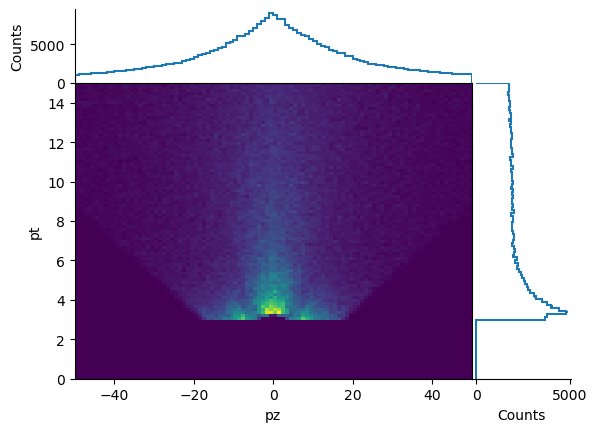

In [58]:
(
    hist.Hist.new.Regular(100, -50, 50, name="pz").Regular(100, 0, 15, name="pt").Double()
        .fill(ak.flatten(muons.pz), ak.flatten(muons.pt))
        .plot2d_full()
);

<br><br><br><br><br>

## Reconstructing the Z boson mass

Now let's do some analysis-like stuff.

If two muons are the decay products of a Z boson, the mass of the sum of those two muons is the Z boson mass.

In [59]:
muons[0, 0]

<MomentumRecord4D ... tau: 0.106, charge: 1} type='Momentum4D["rho": float32, "p...'>

In [60]:
muons[0, 1]

<MomentumRecord4D ... tau: 0.106, charge: -1} type='Momentum4D["rho": float32, "...'>

In [61]:
(muons[0, 0] + muons[0, 1]).mass

89.4919204711914

<br><br><br>

We can vectorize this calculation by selecting all events (first dimension) and only muon number `0` or `1` (second dimension).

In [62]:
muons[:, 0], muons[:, 1]

ValueError: in ListOffsetArray64 attempting to get 0, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.9.0/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21)

<br><br><br>

It didn't work because some events don't have two—or even one—muon.

<br><br><br>

"How many muons does each event have?"

In [63]:
ak.num(muons)

<Array [3, 0, 0, 7, 0, 2, ... 0, 2, 2, 4, 0, 0] type='299973 * int64'>

<br><br><br>

"Which events have at least two muons?"

In [64]:
ak.num(muons) >= 2

<Array [True, False, False, ... False, False] type='299973 * bool'>

<br><br><br>

"Select events with at least two muons."

In [65]:
at_least_2 = muons[ak.num(muons) >= 2]

ak.num(at_least_2)

<Array [3, 7, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 4] type='145597 * int64'>

(Notice that there are fewer of these events.)

<br><br><br>

Now we can get the first and second muons of these events.

In [66]:
mu1 = at_least_2[:, 0]
mu2 = at_least_2[:, 1]

<br><br><br>

And compute the invariant mass.

In [67]:
(mu1 + mu2).mass

<Array [89.5, 29.8, 87.1, ... 27.9, 90.5, 2.4] type='145597 * float32'>

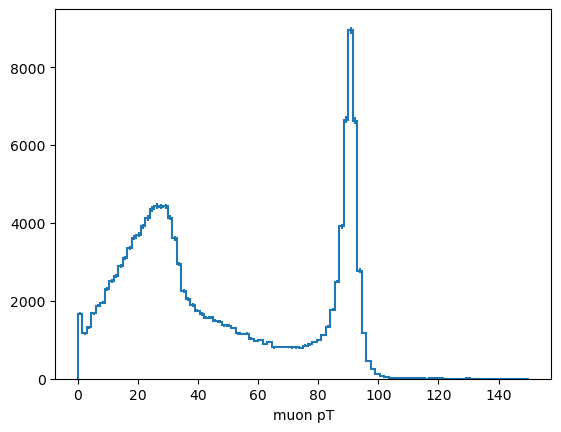

In [68]:
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill((mu1 + mu2).mass)
        .plot()
);

Question to ponder: why did the above not need an `ak.flatten`?

<br><br><br><br><br>

### Physics cuts: opposite sign muons

In the above, we included all first and second muons, regardless of whether they are μ⁺μ⁻, μ⁺μ⁺, or μ⁻μ⁻. Only μ⁺μ⁻ can be decay products of a Z boson.

<br><br><br>

"Which of `mu1` and `mu2` have opposite charges?"

In [69]:
opposite_charges = mu1.charge != mu2.charge
opposite_charges

<Array [True, True, True, ... True, True, True] type='145597 * bool'>

<br><br><br>

"What does the distribution look like if we only use these?"

In [70]:
(mu1[opposite_charges] + mu2[opposite_charges]).mass

<Array [89.5, 29.8, 87.1, ... 27.9, 90.5, 2.4] type='122744 * float32'>

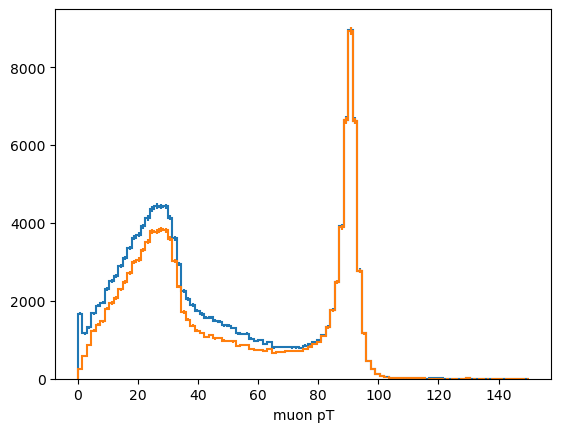

In [72]:
# without a cut (blue)
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill((mu1 + mu2).mass)
        .plot()
);
# with a cut (orange)
(
    hist.Hist.new.Regular(100, 0, 150, name="muon pT").Double()
        .fill((mu1[opposite_charges] + mu2[opposite_charges]).mass)
        .plot()
);

<br><br><br><br><br>

## Particle combinatorics